## QUESTION 1


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [5]:
df_train=pd.read_csv('C:/Users/TechVannah/Downloads/insurance.csv')
df_train

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
#missing data
total=df_train.isnull().sum().sort_values(ascending=False)
percent= (df_train.isnull().sum()/df_train.isnull().count().sort_values(ascending=False))
missing_data=pd.concat([total,percent],axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [15]:
#descriptive statistic summary
df_train['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

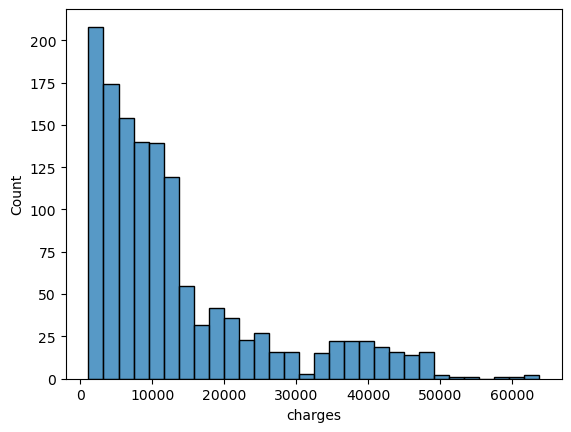

In [16]:
#histogram
sns.histplot(df_train['charges']);

In [14]:
#Skewness and kurtosis
print ("Skewness: %f" % df_train['charges'].skew())
print ("Kurtosis: %f" % df_train['charges'].kurt())

Skewness: 1.515880
Kurtosis: 1.606299


<AxesSubplot:xlabel='age', ylabel='charges'>

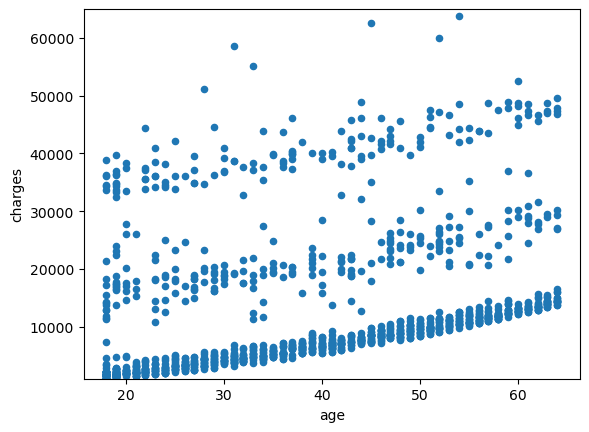

In [31]:
#bivariate analysis charges/age
var='age'
data=pd.concat([df_train['charges'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='charges', ylim=(1000,65000))

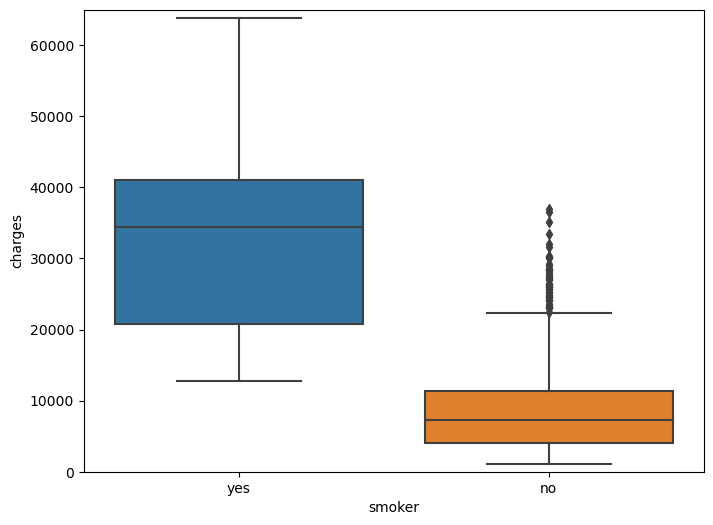

In [44]:
#boxplot smoker/charges
var='smoker'
data= pd.concat([df_train['charges'], df_train[var]], axis=1)
f, ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var, y='charges', data=data)
fig.axis(ymin=0, ymax=65000);

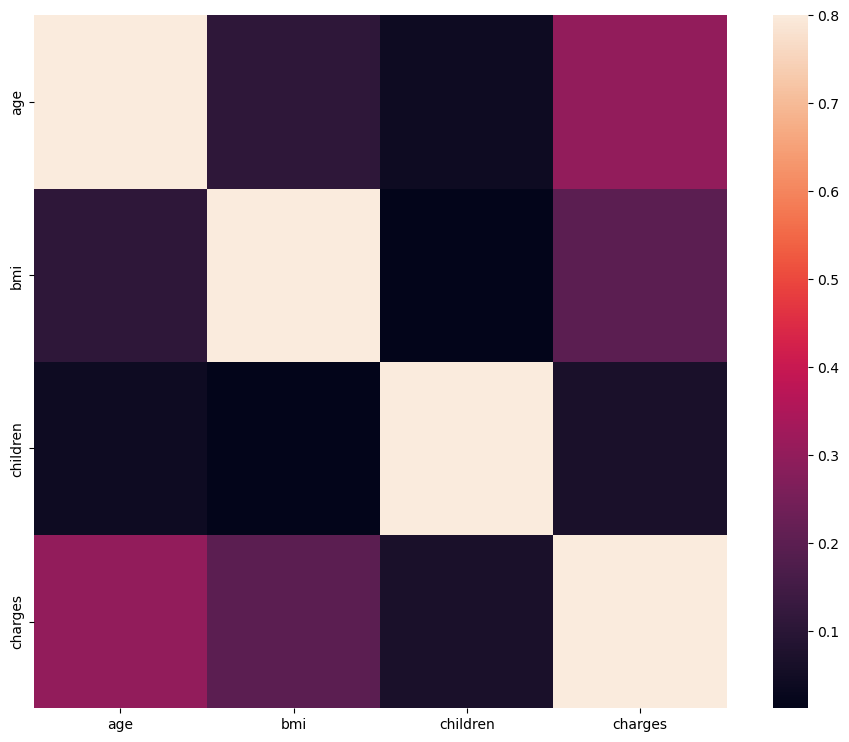

In [45]:
#correlation matrix
corrmat=df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

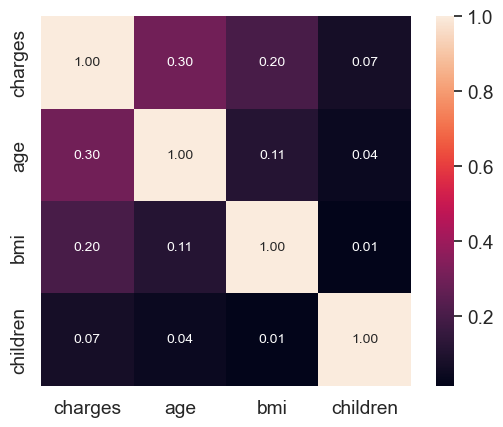

In [73]:
#charges correlation matrix
k= 4 #number of variables for heatmap
cols=corrmat.nlargest(k, 'charges')['charges'].index
cm=np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,xticklabels=cols.values);
plt.show()

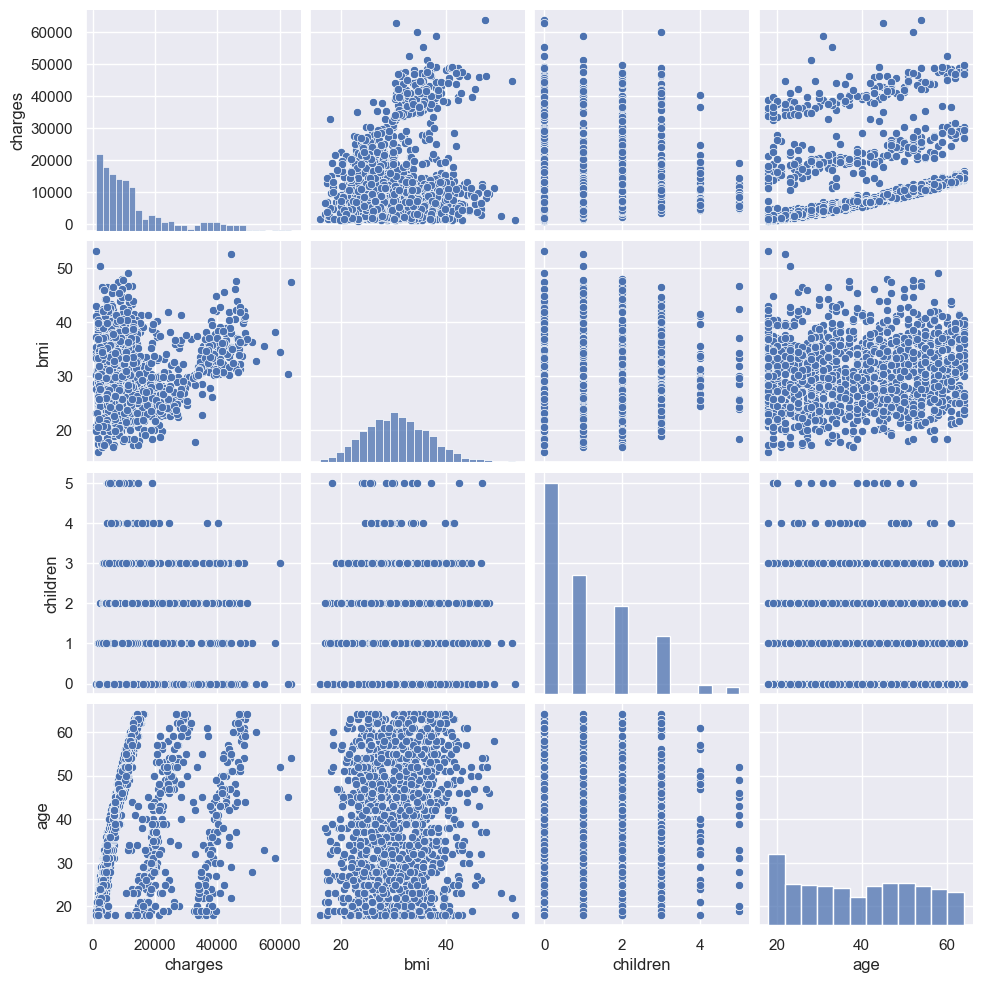

In [71]:
#scatterplolt
sns.set()
cols = ['charges', 'bmi', 'children', 'age']
sns.pairplot(df_train[cols])
plt.show();

# QUESTION 3

## LINEAR REGRESSION

In [74]:
df = pd.read_csv('C:/Users/TechVannah/Downloads/Churn_Modelling (1).csv')

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


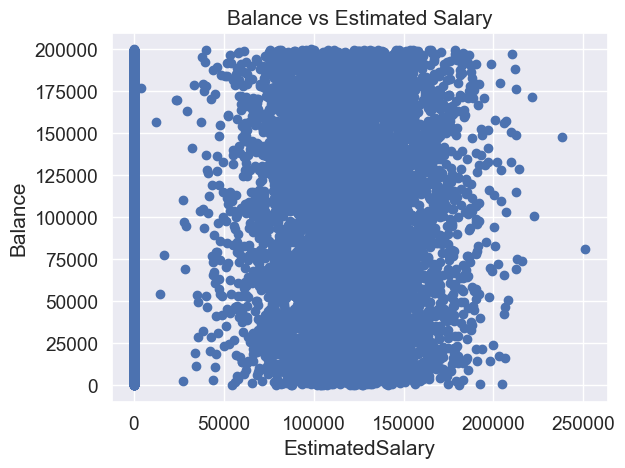

In [85]:
Balance_np = df['Balance'].to_numpy()
EstimatedSalary_np = df['EstimatedSalary'].to_numpy()

import matplotlib.pyplot as plt

plt.scatter(Balance_np, EstimatedSalary_np)
plt.xlabel('EstimatedSalary')
plt.ylabel('Balance')
plt.title('Balance vs Estimated Salary')
plt.show()

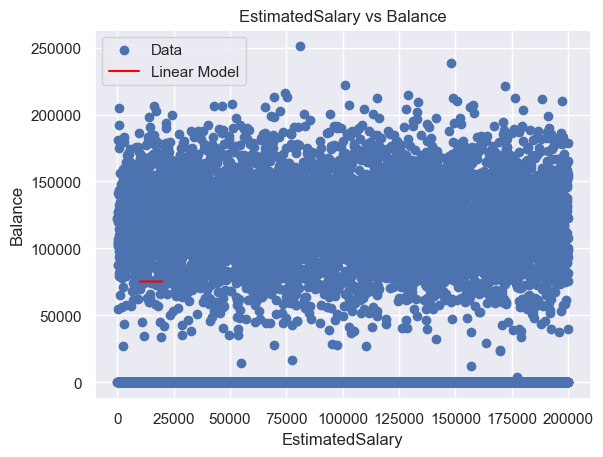

In [163]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(EstimatedSalary_np.reshape((-1, 1)),Balance_np)

import numpy as np
dummy_inputs = np.linspace(start=10000, stop=20000, num=2000)
dummy_predictions = linear_model.predict(dummy_inputs.reshape((-1, 1)))

plt.scatter(EstimatedSalary_np, Balance_np, label='Data')
plt.plot(dummy_inputs, dummy_predictions, label='Linear Model', color='red')
plt.xlabel('EstimatedSalary')
plt.ylabel('Balance')
plt.title('EstimatedSalary vs Balance')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

mae(linear_model.predict(total_bedrooms_np.reshape((-1, 1))),
    total_rooms_np)

## EDA ON THE CHURN DATA

In [117]:
df = pd.read_csv('C:/Users/TechVannah/Downloads/Churn_Modelling (1).csv')

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [118]:
total=df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count().sort_values(ascending=False))
missing_data=pd.concat([total,percent],axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
RowNumber,0,0.0
CustomerId,0,0.0
Surname,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0


In [122]:
#descriptive statistic summary
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

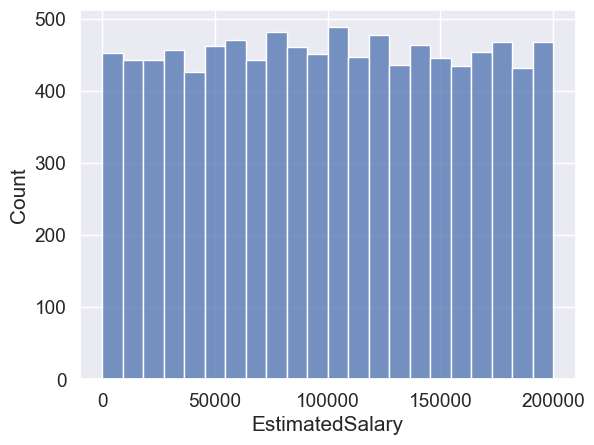

In [133]:
#histogram
sns.histplot(df['EstimatedSalary']);

In [126]:
#Skewness and kurtosis
print ("Skewness: %f" % df['EstimatedSalary'].skew())
print ("Kurtosis: %f" % df['EstimatedSalary'].kurt())

Skewness: 0.002085
Kurtosis: -1.181518


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Balance', ylabel='EstimatedSalary'>

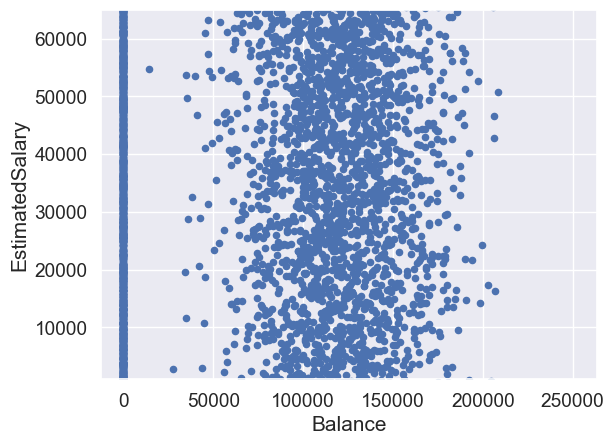

In [154]:
#bivariate analysis EstimatedSalary /Balance
var='Balance'
data=pd.concat([df['EstimatedSalary'], df[var]], axis=1)
data.plot.scatter(x=var, y='EstimatedSalary', ylim=(1000,65000))

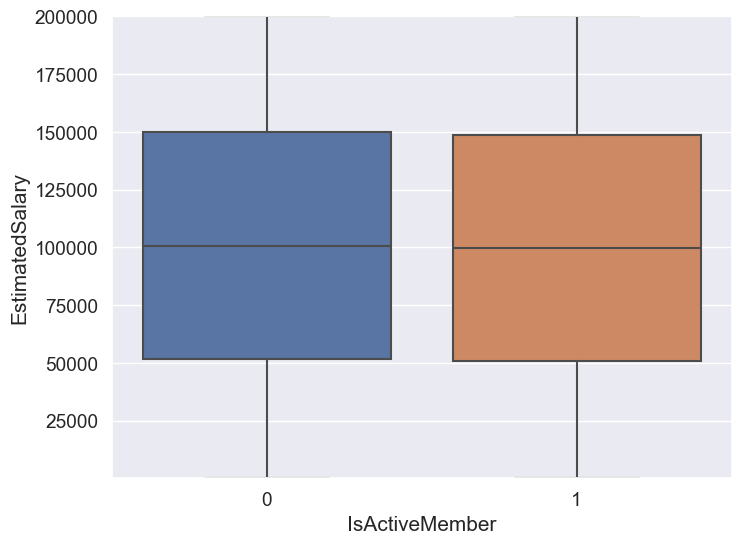

In [148]:
#boxplotIsActiveMember/EstimatedSalary
var='IsActiveMember'
data= pd.concat([df['EstimatedSalary'], df[var]], axis=1)
f, ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var, y='EstimatedSalary', data=data)
fig.axis(ymin=11, ymax=200000);

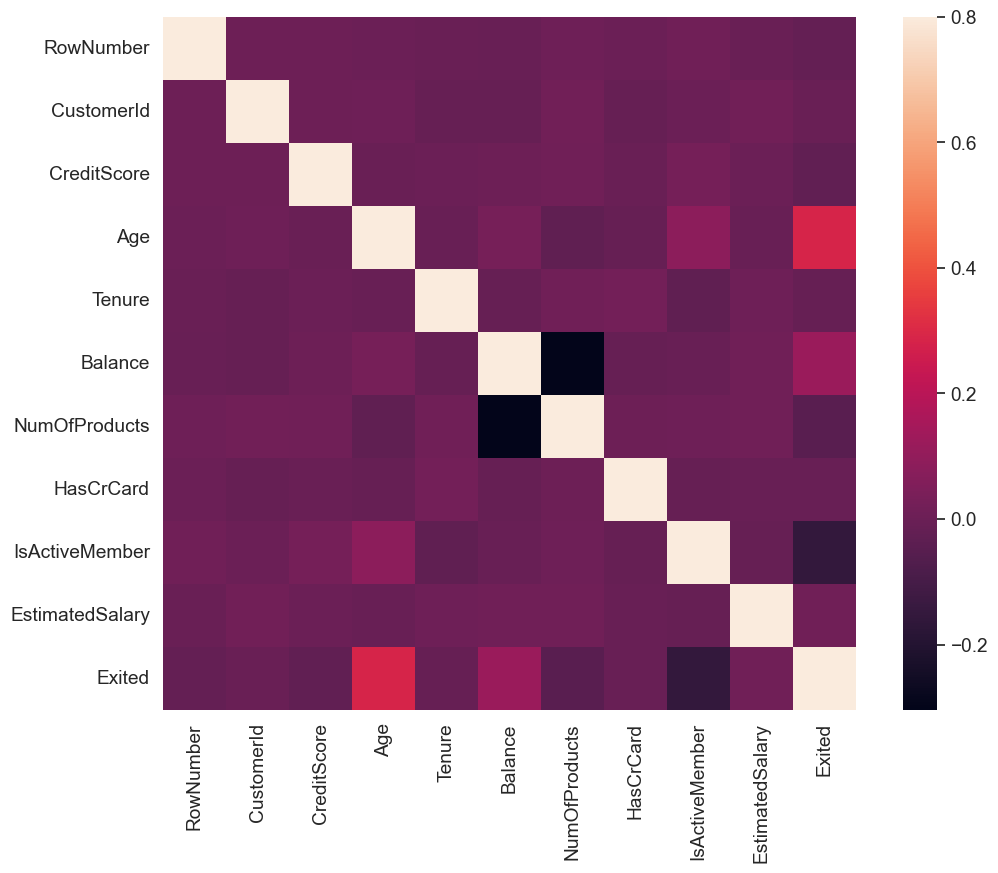

In [155]:
#correlation matrix
corrmat=df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

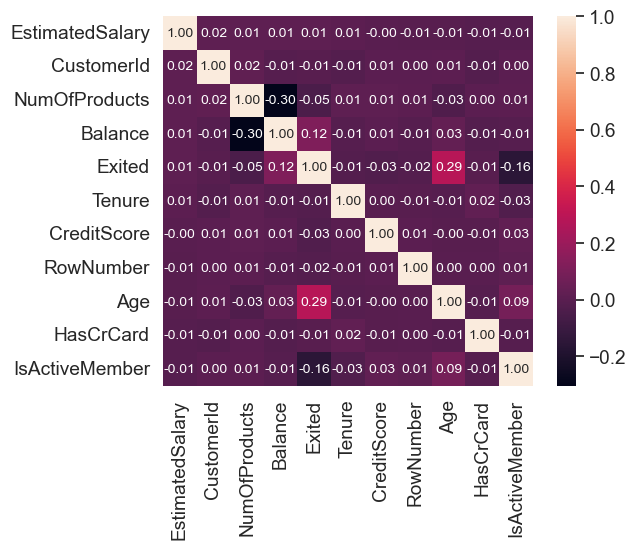

In [157]:
# EstimatedSalary correlation matrix
k= 11 #number of variables for heatmap
cols=corrmat.nlargest(k, 'EstimatedSalary')['EstimatedSalary'].index
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,xticklabels=cols.values);
plt.show()

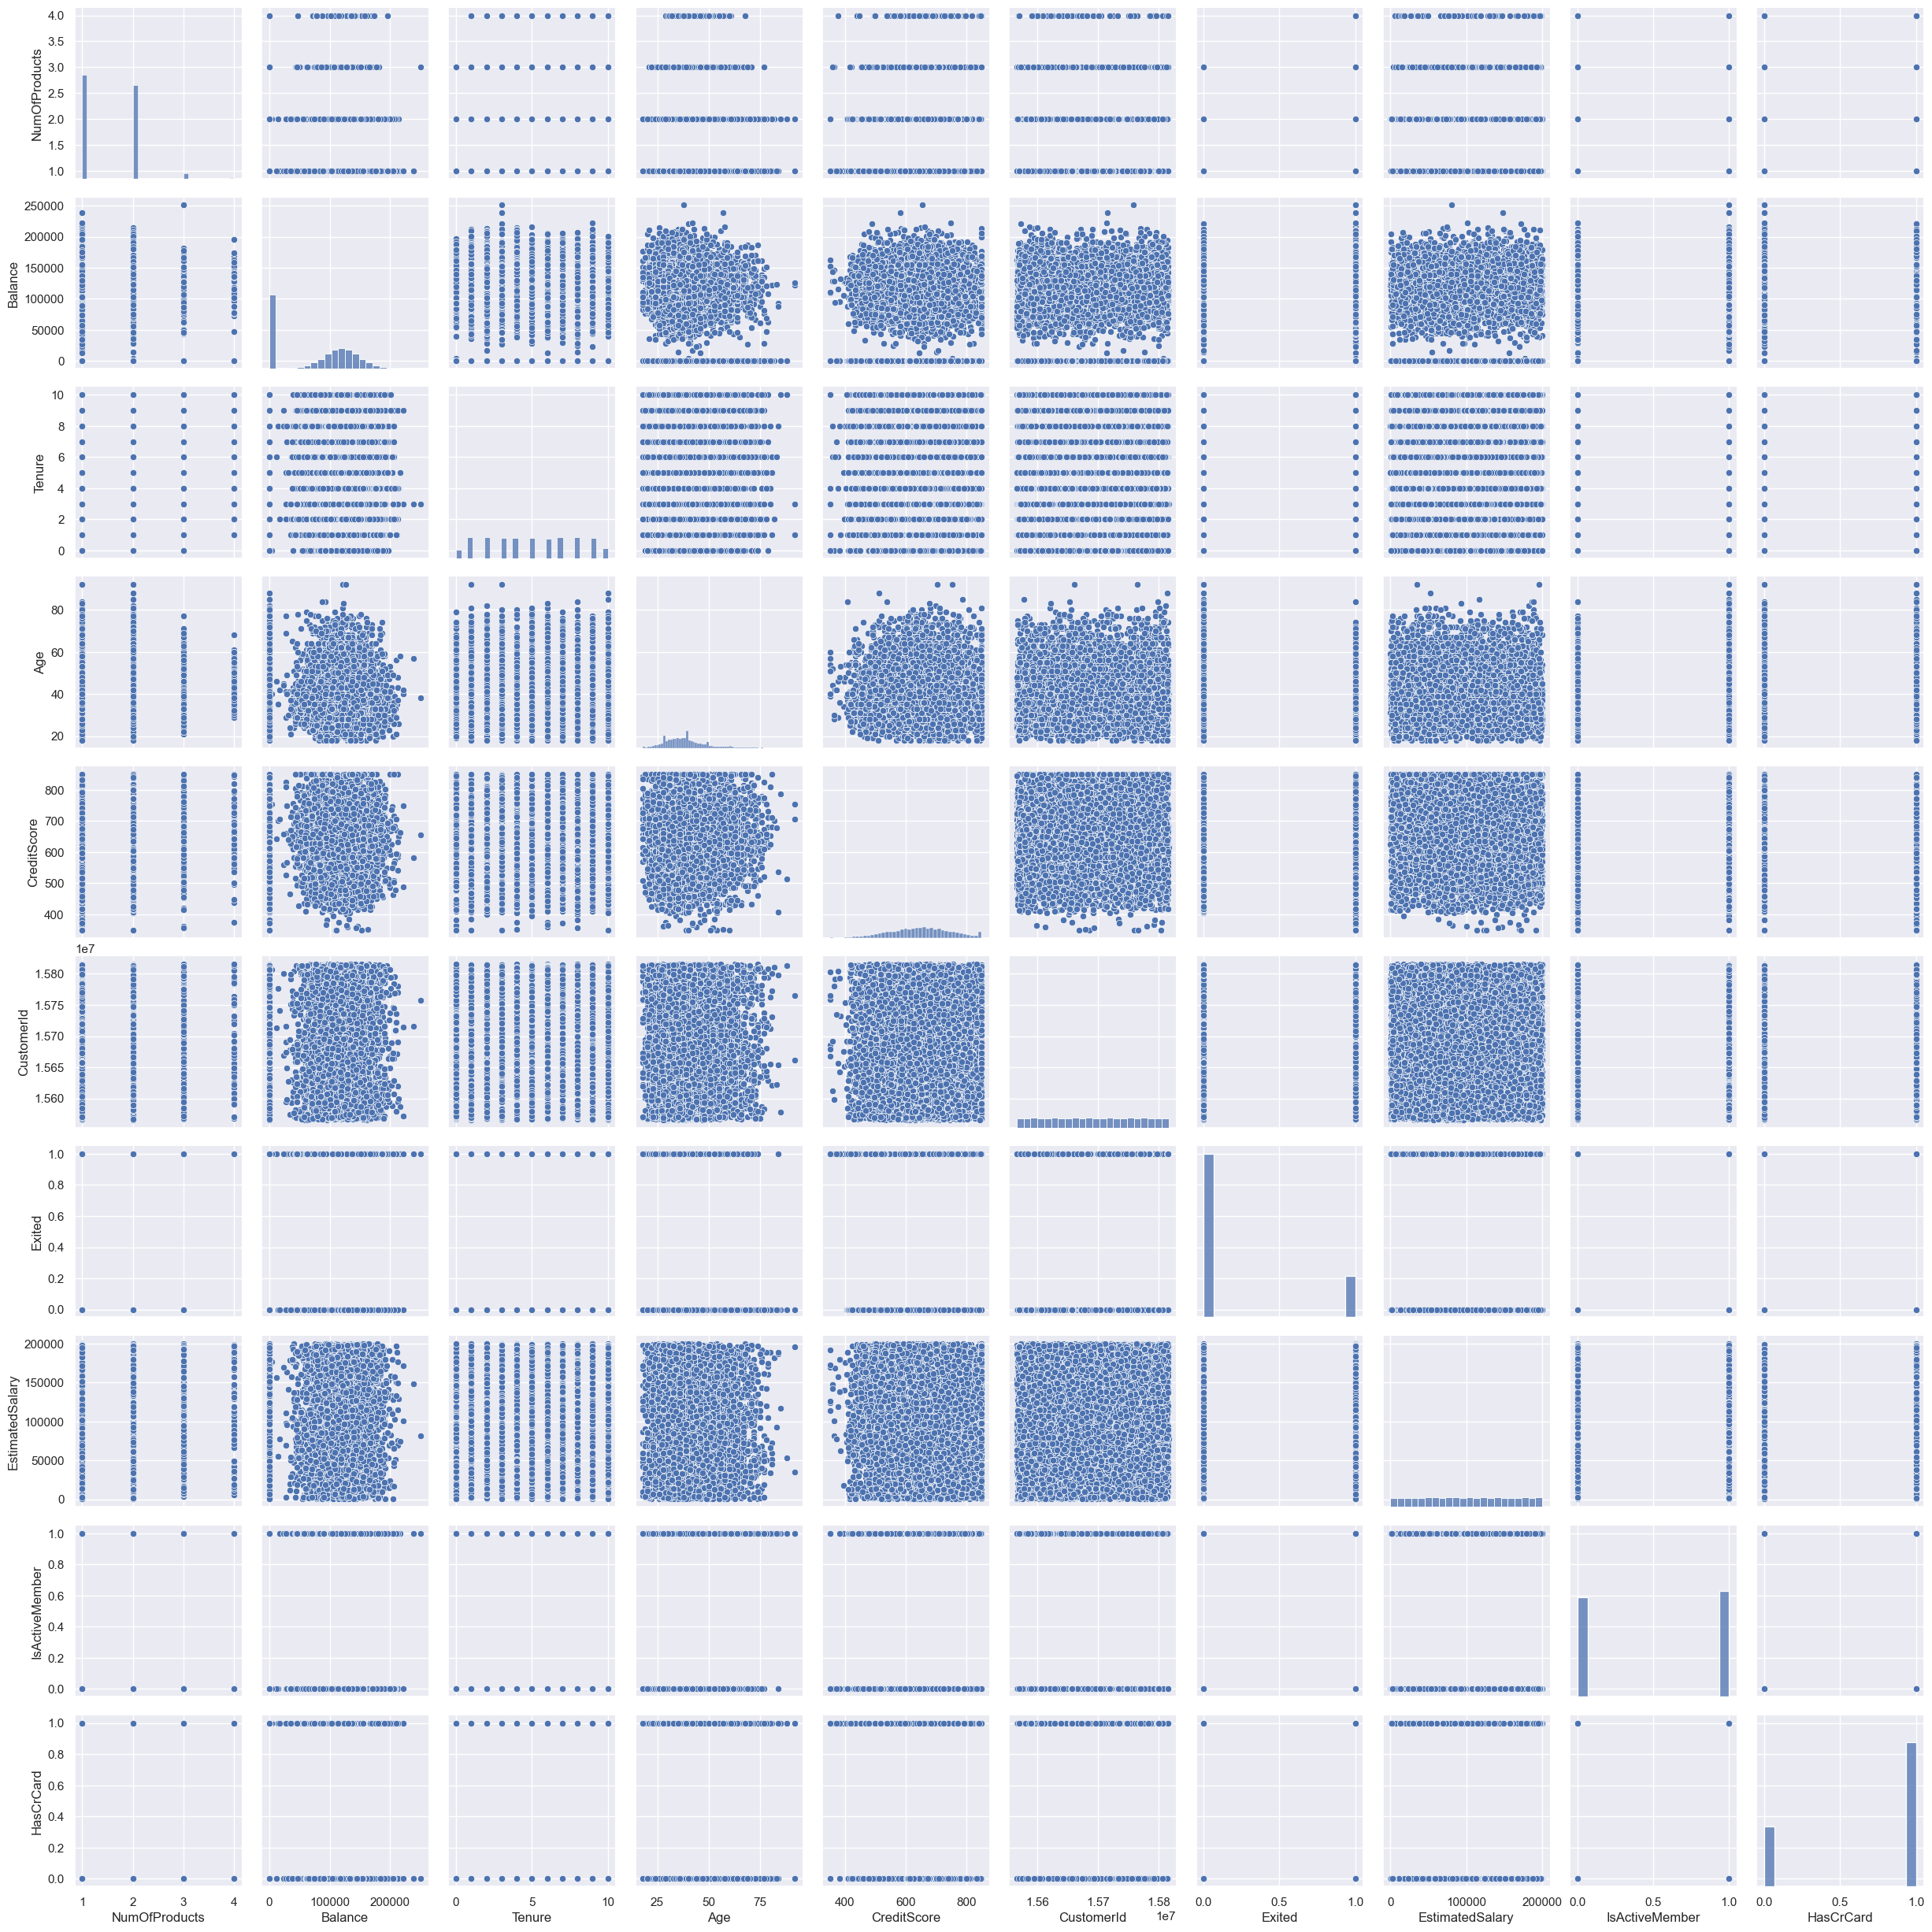

In [160]:
#scatterplolt
sns.set()
cols = ['NumOfProducts','Balance','Tenure','Age','CreditScore','CustomerId','Exited','EstimatedSalary','IsActiveMember','HasCrCard']
sns.pairplot(df[cols])
plt.show();